In [40]:
print("workflows")

workflows


#  Sequential Workflows in LangGraph

## 1_calculate_bmi workflow

In [41]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [42]:
# defining state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi: float
    category: str
    

In [43]:
# defining nodes
def calculate_bmi(state: BMIState)-> BMIState:
    weight = state["weight_kg"]
    height = state["height_m"]
    print("calculation of mbi is done")
    bmi = weight/(height**2)
    state["bmi"] = round(bmi, 2)
    return state


In [44]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state


In [45]:
# buid the graph
graph = StateGraph(BMIState)

In [46]:
# adding nodes in graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# adding edges in graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")
graph.add_edge("label_bmi", END)

In [47]:
# comile the graph
workflow = graph.compile()

In [49]:
weight = float(input("Enter Weight in kg: "))
height = float(input("Enter height in m: "))
state = { "weight_kg": weight,
          "height_m": height
        }

result = workflow.invoke(state)

print(result)
# print("calculated bmi: ",result["bmi"])
# print("category bmi: ",result["category"])


calculation of mbi is done
{'weight_kg': 12.0, 'height_m': 3.0, 'bmi': 1.33, 'category': 'Underweight'}


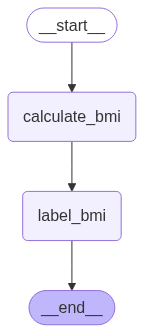

In [50]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

## 2 simple LLM workflow

In [51]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import START, END, StateGraph
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.2)



In [52]:
# defining state
class LLMState(TypedDict):
    question: str
    answer: str



In [53]:
# defing llm node
def chatbot(state: LLMState) -> LLMState:
    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = answer

    return state



In [54]:
# defining the graph
graph = StateGraph(LLMState)

# adding nodes
graph.add_node("chatbot", chatbot)

graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

workflow = graph.compile()



In [55]:
# exicute the graph
state = {"question": "How far is moon from the earth?"}
result = workflow.invoke(state)

print(result["answer"])

The distance between the Earth and the Moon varies because the Moon's orbit is not a perfect circle.  However, the average distance is approximately **238,855 miles (384,400 kilometers)**.


## 3 prompt chaining workflow

In [62]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

# create a model
model =  ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.2)



In [63]:
# defining state 
class BLOGState(TypedDict):
    topic: str
    outline : str
    blog: str




In [71]:
# defing node
def generate_outline(state: BLOGState) -> BLOGState:

    topic = state["topic"]
    outline_prompt = f"Generate a detailed outline for a blog on the topic - {topic}"
    outline = model.invoke(outline_prompt).content
    state["outline"] = outline
    return state

def generate_blog(state: BLOGState) -> BLOGState:

    topic = state["topic"]
    outline = state["outline"]
    prompt = f"Write a detailed blog on the topic - {topic} using the follwing outline \n {outline}"
    blog = model.invoke(prompt).content
    state["blog"] = blog
    return state

# defining a graph
graph = StateGraph(BLOGState)







In [72]:
# Adding Nodes, Edges and compile Graph  
graph.add_node("generate_outline", generate_outline)
graph.add_node("generate_blog", generate_blog)

graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline","generate_blog")
graph.add_edge("generate_blog", END)

workflow = graph.compile()



In [73]:
# exicurte the graph
state = {"topic": "Agentic AI"}

result = workflow.invoke(state)

print(result)

{'topic': 'Agentic AI', 'outline': "## Blog Outline: Agentic AI - The Rise of Autonomous Artificial Intelligence\n\n**I. Introduction (approx. 100-150 words)**\n\n* **Hook:** Start with a captivating example of AI exhibiting agentic behavior (e.g., a robot navigating a complex environment without explicit instructions, an AI managing a complex system autonomously).\n* **Define Agentic AI:** Clearly define what agentic AI is, differentiating it from reactive and goal-oriented AI. Emphasize its key characteristic: independent action and decision-making based on its own internal models and goals.\n* **Brief overview of the blog's content:** Briefly outline the topics that will be covered in the blog post.\n* **Thesis statement:** State the central argument – e.g.,  Agentic AI represents a significant leap in AI capabilities, presenting both immense opportunities and significant challenges.\n\n\n**II. Understanding the Core Concepts (approx. 200-300 words)**\n\n* **Defining Autonomy:** Exp

In [74]:
print(result["blog"])

## Agentic AI: The Rise of Autonomous Artificial Intelligence

**I. Introduction**

Imagine a robot surgeon performing a complex operation with minimal human intervention, adapting its technique in real-time to unforeseen circumstances.  Or picture an AI managing a sprawling power grid, autonomously predicting and preventing outages, optimizing energy distribution across millions of users. These are not scenes from a science fiction movie; they represent the burgeoning reality of agentic AI.  Agentic AI refers to artificial intelligence systems capable of independent action and decision-making, going beyond simply reacting to inputs or following pre-programmed instructions.  Unlike reactive AI, which responds directly to stimuli, or goal-oriented AI, which works towards predefined objectives, agentic AI possesses a degree of autonomy, setting its own goals and devising strategies to achieve them. This blog post will delve into the core concepts of agentic AI, explore its applications, 